In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding,  SimpleRNN
from tensorflow.keras.utils import plot_model
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense
import numpy as np

In [119]:
max_features= 10000
max_len = 500
batch_size = 32

In [120]:
(input_train , y_train) , (input_test, y_test) = imdb.load_data(num_words = max_features)

In [121]:
input_train = sequence.pad_sequences(input_train, maxlen=max_len)
input_test = sequence.pad_sequences(input_test, maxlen=max_len)

In [122]:
reversed_word_index= {value:key for key , value in imdb.get_word_index().items()}
word_index=  imdb.get_word_index() 

In [143]:
print(reversed_word_index[166])
print(reversed_word_index[76])
print( word_index['hate'])
print( word_index['like'])

find
get
781
37


In [176]:
model = Sequential()
model.add(Embedding(max_features, 10))
model.add(SimpleRNN(32, return_sequences=True))
model.add(Dense(1, activation = 'sigmoid'))
model.compile(optimizer = 'rmsprop', loss='binary_crossentropy' , metrics = ['acc'])


In [177]:
dist = []
for   i in range(0,1):
    print('epoch {}'.format(i))
    history = model.fit(input_train , y_train , epochs = 1, batch_size= 128 , validation_split = 0.2)
    el = model.layers[0]
    wt = el.get_weights()[0]
    d= np.linalg.norm( wt[781]-wt[37])
    dist.append(d)
    print(d)


epoch 0
157/157 [==============================] - 20s 125ms/step - loss: 0.6710 - acc: 0.5635 - val_loss: 0.6374 - val_acc: 0.6004
0.2096116


In [178]:
el1 = model.layers[1]
wt1 = el1.get_weights()[1]
 

In [185]:
el1.get_weights()[0][0]

array([ 0.18117107, -0.15173893,  0.44436812,  0.47360238, -0.12427093,
        0.09877548, -0.21530871,  0.29211342, -0.13326989, -0.11793385,
        0.302798  ,  0.02437606, -0.2511597 , -0.26328713,  0.3345521 ,
        0.29145256, -0.3730625 , -0.22611085, -0.46578386,  0.09800994,
        0.32843   ,  0.30089355,  0.33719376, -0.20089507,  0.12052587,
        0.27974322,  0.21128353, -0.32232168,  0.27869838, -0.31509018,
       -0.18427539, -0.00608462], dtype=float32)

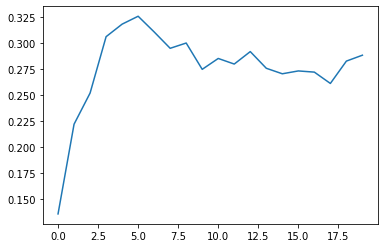

In [154]:
plt.plot(range(0,20),dist)

In [156]:
' '.join([reversed_word_index[i]  for i in input_train[1][400:]])

"makes this stretch and of solid it thought begins br senator and budget worthwhile though ok and awaiting for ever better were and diverse for budget look kicked any to of making it out and follows for effects show to show cast this family us scenes more it severe making senator to and finds tv tend to of emerged these thing wants but and an beckinsale cult as it is video do you david see scenery it in few those are of ship for with of wild to one is very work dark they don't do dvd with those them"

In [105]:
word_index['get']

76

In [91]:
reversed_word_index

['for',
 'on',
 'of',
 'great',
 'stupid',
 'of',
 'their',
 'as',
 'end',
 'should',
 'is',
 'very',
 'together',
 'br',
 'twilight',
 'us',
 'writer',
 'br',
 'were',
 'machines',
 'go',
 'bad',
 'aka',
 'were',
 'young',
 'to',
 'might',
 'us',
 'father',
 'film',
 'any',
 'more',
 'it',
 'her',
 'get',
 'predictable',
 'of',
 'alleged',
 'for',
 'find',
 'dvd',
 'from',
 'through',
 "i'm",
 'her',
 'get',
 'up',
 'happily',
 'date',
 'of',
 'lionel',
 'with',
 'other',
 'is',
 'him',
 'pushed',
 'has',
 'columbo',
 'criticized',
 'to',
 "what's",
 'of',
 'thief',
 'this',
 'so',
 'superior',
 'too',
 'not',
 'as',
 'you',
 'it',
 'get',
 'up',
 'br',
 'is',
 'others',
 'their',
 'was',
 'out',
 'least',
 'that',
 'hilarious',
 'not',
 'was',
 'into',
 'through',
 'to',
 'why',
 'for',
 'as',
 'it',
 'by',
 'br',
 'of',
 'where',
 'suits',
 'was',
 'one',
 'your']

In [88]:
input_train[8]

array([  15,   20,    4,   84,  376,    4,   65,   14,  127,  141,    6,
         52,  292,    7, 4751,  175,  561,    7,   68, 3866,  137,   75,
       2541,   68,  182,    5,  235,  175,  333,   19,   98,   50,    9,
         38,   76,  724,    4, 6750,   15,  166,  285,   36,  140,  143,
         38,   76,   53, 3094, 1301,    4, 6991,   16,   82,    6,   87,
       3578,   44, 2527, 7612,    5,  800,    4, 3033,   11,   35, 1728,
         96,   21,   14,   22,    9,   76,   53,    7,    6,  406,   65,
         13,   43,  219,   12,  639,   21,   13,   80,  140,    5,  135,
         15,   14,    9,   31,    7,    4,  118, 3672,   13,   28,  126],
      dtype=int32)

In [66]:
reversed_word_index[1401]

'ahead'

In [44]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_11 (Embedding)     (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_11 (SimpleRNN)    (None, 32)                2080      
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 33        
Total params: 322,113
Trainable params: 322,113
Non-trainable params: 0
_________________________________________________________________


array([ 0.04906577, -0.01500022, -0.03006481,  0.02676964, -0.02561452,
        0.03151833,  0.00459572, -0.01573221, -0.00185541, -0.03438999],
      dtype=float32)

'find'

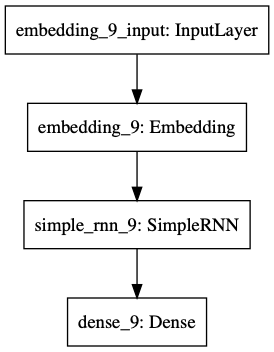

In [24]:
plot_model(model)

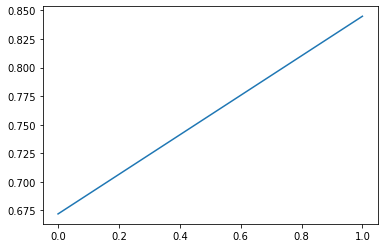

In [10]:
acc = history.history['acc']
plt.plot(range(2), acc)

In [53]:
word_index['a']

3